### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.__version__

'0.11.1'

In [3]:
summer_2016=pd.read_csv("data/datacamp/summer2016.csv")
summer_2016.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [4]:
summer_2016.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

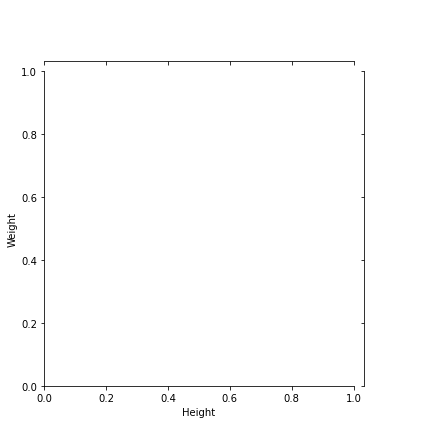

In [5]:
sns.JointGrid(x="Height", y="Weight", data=summer_2016)

Calling the constructor initializes the figure, but it does not plot anything:

The simplest plotting method, `JointGrid.plot()` accepts a pair of functions (one for the joint axes and one for both marginal axes):

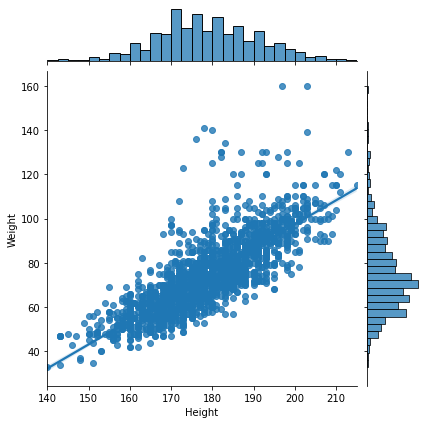

In [6]:
g=sns.JointGrid(x="Height", y="Weight", data=summer_2016)
g.plot(sns.regplot, sns.histplot)

The `JointGrid.plot()` function also accepts additional keyword arguments, but it passes them to both functions:

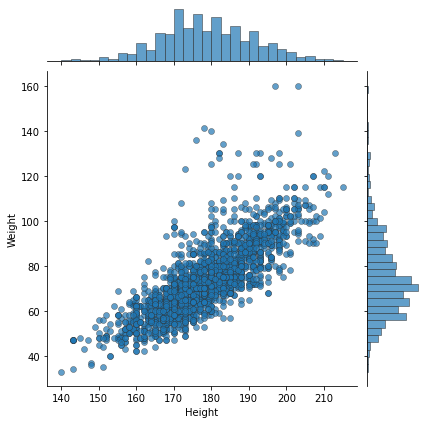

In [7]:
g=sns.JointGrid(x="Height", y="Weight", data=summer_2016)
g.plot(sns.scatterplot, sns.histplot, alpha=.7, 
       edgecolor=".2", linewidth=.5)

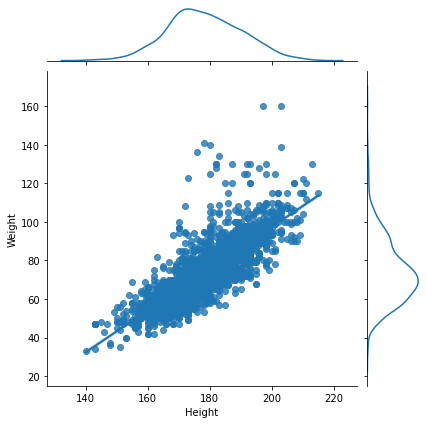

In [8]:
g=sns.JointGrid(x="Height", y="Weight", data=summer_2016)
g.plot(sns.regplot, sns.kdeplot)

### Advance JointGrid

If you need to pass different keyword arguments to each function, you’ll have to invoke `JointGrid.plot_joint()` and `JointGrid.plot_marginals()`:

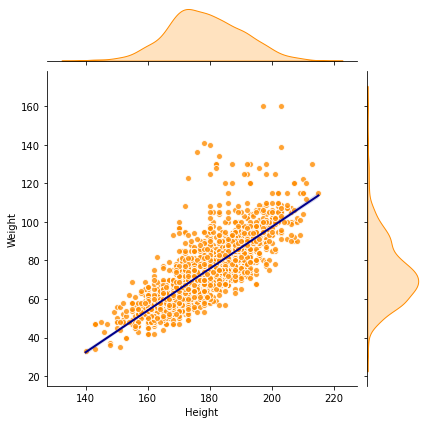

In [9]:
g=sns.JointGrid(x="Height", y="Weight", data=summer_2016)
g.plot_joint(sns.regplot, order=1, color="DarkOrange", 
            scatter_kws={"alpha":0.8, "edgecolor":"white"}, 
            line_kws={"color":"DarkBlue", "linewidth":2})

g.plot_marginals(sns.kdeplot, fill=True, color="DarkOrange")

You can also set up the grid without assigning any data:

In [10]:
sns.set_style("darkgrid")

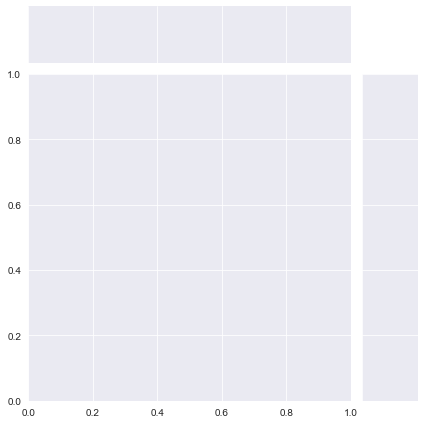

In [11]:
g=sns.JointGrid()

You can then plot by accessing the `ax_joint`, `ax_marg_x`, and `ax_marg_y` attributes, which are `matplotlib.axes.Axes` objects:

<AxesSubplot:xlabel='Height', ylabel='Weight'>

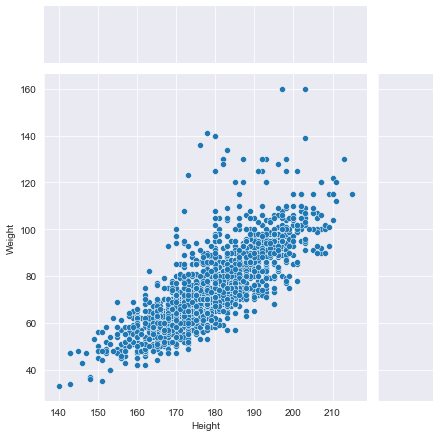

In [12]:
g=sns.JointGrid()
sns.scatterplot(x="Height", y="Weight", data=summer_2016, 
               ax=g.ax_joint)

<AxesSubplot:xlabel='Height', ylabel='Count'>

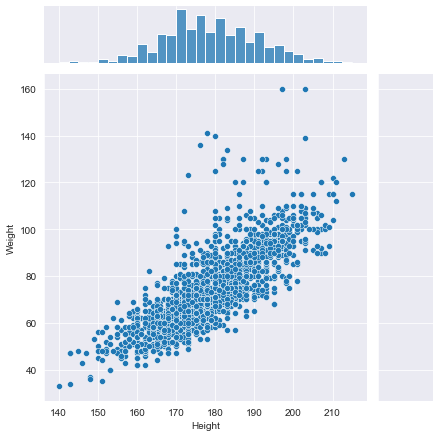

In [13]:
g=sns.JointGrid()
sns.scatterplot(x="Height", y="Weight", data=summer_2016, 
               ax=g.ax_joint)
sns.histplot(x="Height", data=summer_2016, 
            ax=g.ax_marg_x)

<AxesSubplot:xlabel='Density', ylabel='Weight'>

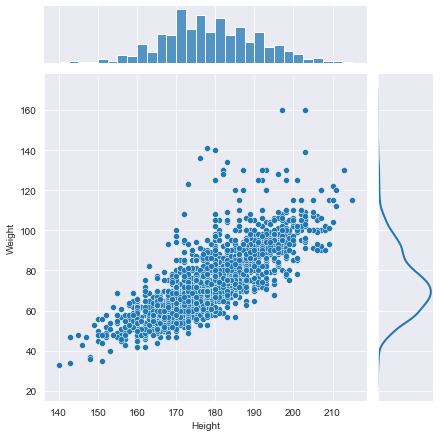

In [14]:
g=sns.JointGrid()
sns.scatterplot(x="Height", y="Weight", data=summer_2016, 
               ax=g.ax_joint)
sns.histplot(x="Height", data=summer_2016, 
            ax=g.ax_marg_x)
sns.kdeplot(y="Weight", 
            data=summer_2016, 
            linewidth=2, 
            ax=g.ax_marg_y)

### Set `hue`

In [15]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


If the functions accept a hue variable, you can use it by assigning hue when you call the constructor:

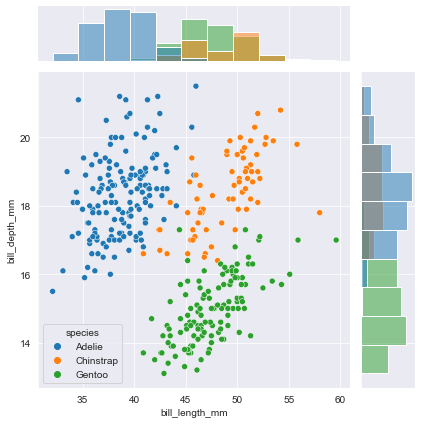

In [16]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", 
                  y="bill_depth_mm", 
                  hue="species")
g.plot(sns.scatterplot, sns.histplot)

### Figure size

The figure will always be square (unless you resize it at the matplotlib layer), but its overall size and layout are configurable. The size is controlled by the `height` parameter. The relative ratio between the joint and marginal axes is controlled by `ratio`, and the amount of space between the plots is controlled by `space`:

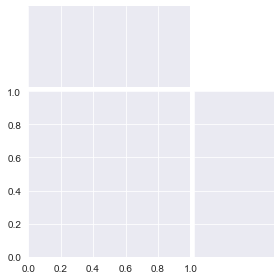

In [17]:
sns.JointGrid(height=4, ratio=2, space=.05)

By default, the ticks on the density axis of the marginal plots are turned off, but this is configurable:

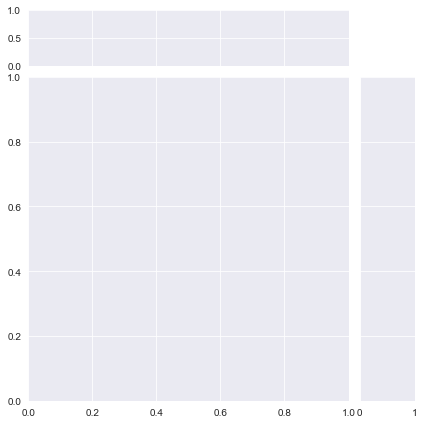

In [18]:
sns.JointGrid(marginal_ticks=True)

### Joint plot

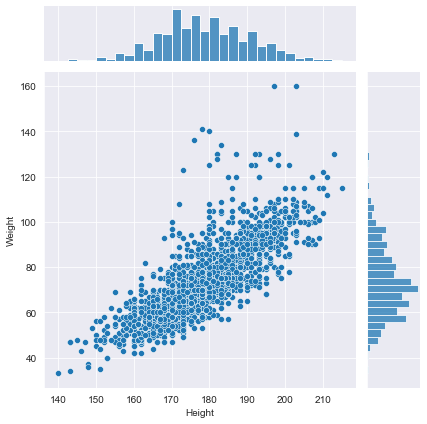

In [19]:
sns.jointplot(x='Height', y="Weight", data=summer_2016)

### Setting kind in `sns.jointplot()`
`kind="kde"`

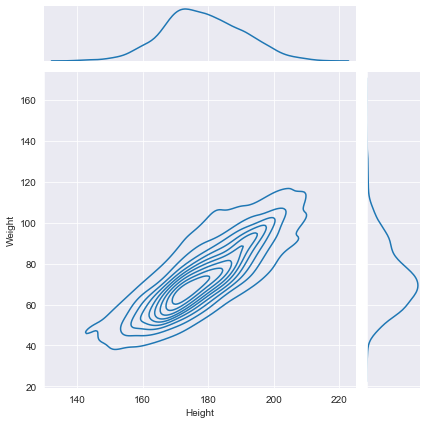

In [20]:
sns.jointplot(x="Height", y="Weight", data=summer_2016, 
             kind="kde")

`kind="reg"`

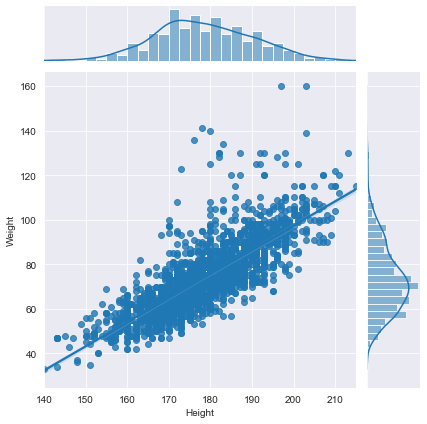

In [21]:
sns.jointplot(x="Height", y="Weight", data=summer_2016, 
             kind="reg")

`kind="hist"`

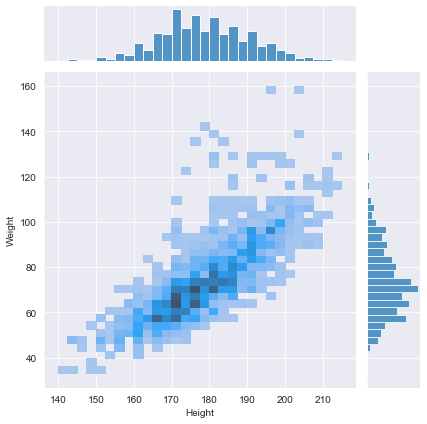

In [22]:
sns.jointplot(x="Height", y="Weight", data=summer_2016, 
             kind="hist")

### Return joingrid

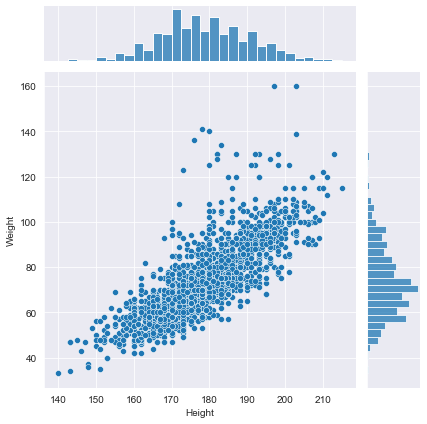

In [23]:
g=sns.jointplot(x="Height", y="Weight", data=summer_2016)

In [24]:
type(g)

seaborn.axisgrid.JointGrid